# Collaboration and Competition


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from unityagents import UnityEnvironment
from agent import MultiAgent, Agent
from maddpg_learning import maddpg
from utils import plot_scores

In [2]:
# Initialize the Environment
env = UnityEnvironment(file_name="Tennis.app")

# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Get the action size
action_size = brain.vector_action_space_size

# Get the state size
state_size = len(env_info.vector_observations[0])

# Get number of agents
num_agents = len(env_info.agents)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
#Set hyperparameters

BUFFER_SIZE = int(1e5)    # replay buffer size
BATCH_SIZE = 256          # batch size
GAMMA = 0.99              # discount factor
TAU = 5e-2                # for soft update of target parameters
LR_ACTOR = 5e-4           # learning rate of the actor
LR_CRITIC = 5e-3          # learning rate of the critic
WEIGHT_DECAY = 0          # weight decay for the optimizers
UPDATE_EVERY = 1          # how often to update the network

AVERAGE_SCORE_SOLVED=0.5  # average score (over 100 consecutive episodes) needed to solve the environment
EPSILON = 2               # for scaling the noise added to the actions (exploration)
EPSILON_DECAY = 0.9999    # for decaying the noise during training

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Torch device to use


In [4]:
#Initialize MADDPG agent and train it

agent = MultiAgent(state_size=state_size,
                        action_size=action_size,
                        num_agents=num_agents,
                        buffer_size=BUFFER_SIZE,
                        batch_size=BATCH_SIZE,
                        gamma=GAMMA,
                        tau=TAU,
                        learning_rate_actor=LR_ACTOR,
                        learning_rate_critic=LR_CRITIC,
                        weight_decay=WEIGHT_DECAY,
                        device=device,
                        update_every=UPDATE_EVERY,
                        random_seed=42)

scores, rolling_average_scores, num_episodes_solved = maddpg(env=env,
                                                             agent=agent,
                                                             num_agents=num_agents,
                                                             average_score_solved=AVERAGE_SCORE_SOLVED,
                                                             epsilon=EPSILON,
                                                             epsilon_decay=EPSILON_DECAY)


Episode 100	Average Score: 0.0199	Current Max Score: 0.00
Episode 200	Average Score: 0.0466	Current Max Score: 0.10
Episode 300	Average Score: 0.0553	Current Max Score: 0.00
Episode 400	Average Score: 0.0926	Current Max Score: 0.10
Episode 500	Average Score: 0.1137	Current Max Score: 0.10
Episode 600	Average Score: 0.1780	Current Max Score: 0.10
Episode 700	Average Score: 0.2692	Current Max Score: 0.49
Episode 800	Average Score: 0.1758	Current Max Score: 0.20
Episode 900	Average Score: 0.4098	Current Max Score: 0.20
Episode 1000	Average Score: 0.2985	Current Max Score: 0.00
Episode 1100	Average Score: 0.2077	Current Max Score: 0.20
Episode 1197	Average Score: 0.5045	Current Max Score: 2.50
Environment solved in 1097 episodes!	Average Score: 0.50	Total Time: 25 minutes 48 seconds


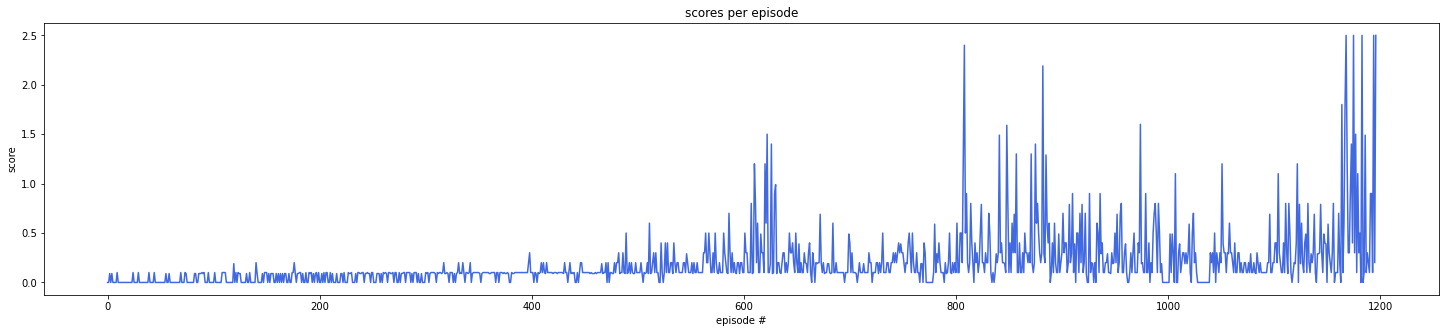

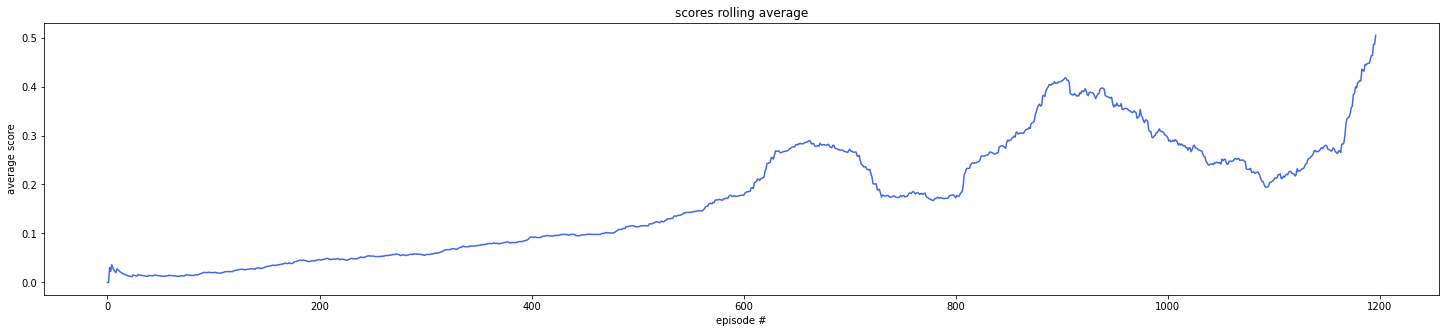

In [8]:
#Plot the training session - scores per episode averaged across all agents and the rolling average

plot_scores(scores, title='scores per episode', y_label='score', x_label='episode #')
plot_scores(rolling_average_scores, title='scores rolling average', y_label='average score', x_label='episode #')

In [11]:
#See the trained agent in action.

#Uncomment these lines to use a saved checkpoint:
#agent = MultiAgent(state_size=state_size,
#                        action_size=action_size,
#                        num_agents=num_agents,
#                        buffer_size=BUFFER_SIZE,
#                        batch_size=BATCH_SIZE,
#                        gamma=GAMMA,
#                        tau=TAU,
#                        learning_rate_actor=LR_ACTOR,
#                        learning_rate_critic=LR_CRITIC,
#                        weight_decay=WEIGHT_DECAY,
#                        device=device,
#                        update_every=UPDATE_EVERY,
#                        random_seed=42)
#agent.load_actor_checkpoints()

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations              # get the current state

test_scores = np.zeros(num_agents) 
while True:
    actions = agent.act(states, add_noise=False)   # select an action
    env_info = env.step(actions)[brain_name]       # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards                     # get the reward
    dones = env_info.local_done                    # see if episode has finished
    states = next_states                           # roll over the state to next time step
    test_scores += rewards                              # update the score
    if np.any(dones):                              # exit loop if episode finished
        break
    
print("Max Score: {}".format(np.max(test_scores)))


Max Score: 1.8000000268220901


In [12]:
env.close()